In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### 상향트렌드 데이터 100개

In [6]:
series = pd.Series([i+np.random.randint(10) for i in range(1,100)]) 

In [13]:
series

0       5
1      10
2      10
3       5
4       5
     ... 
94    103
95    102
96    104
97    103
98    100
Length: 99, dtype: int64

In [7]:
result = seasonal_decompose(series,model = 'additive', freq = 1)

<ipython-input-7-ee952f3a03ba>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(series,model = 'additive', freq = 1)


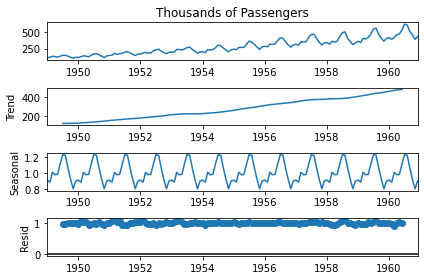

In [35]:
result.plot();
result.

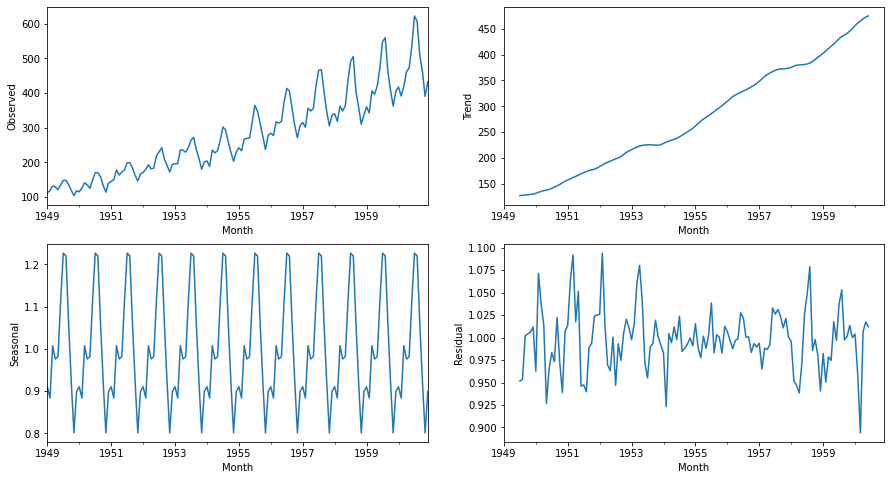

In [38]:
def plot_decompose(decomposeresult):
    fig, axes =plt.subplots(2,2, figsize = (15,8))
    decomposeresult.observed.plot(legend = False, ax = axes[0][0])
    axes[0][0].set_ylabel('Observed')
    decomposeresult.trend.plot(legend = False, ax = axes[0][1])
    axes[0][1].set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend = False, ax = axes[1][0])
    axes[1][0].set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend = False, ax = axes[1][1])
    axes[1][1].set_ylabel('Residual')
    
plot_decompose(result)

y_t = Level * Error * Trend * Seasonality

multiplicative 모델인데, log를 씌워주면 additive로 바뀌게 됨.

In [19]:
series = pd.Series([i**2 for i in range(1,100)])

<AxesSubplot:>

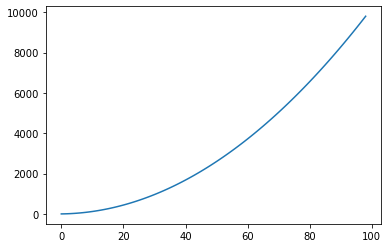

In [20]:
series.plot()

In [22]:
result=seasonal_decompose(series, model = 'multiplicative', freq = 1)

<ipython-input-22-a65cfdcb57e1>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result=seasonal_decompose(series, model = 'multiplicative', freq = 1)


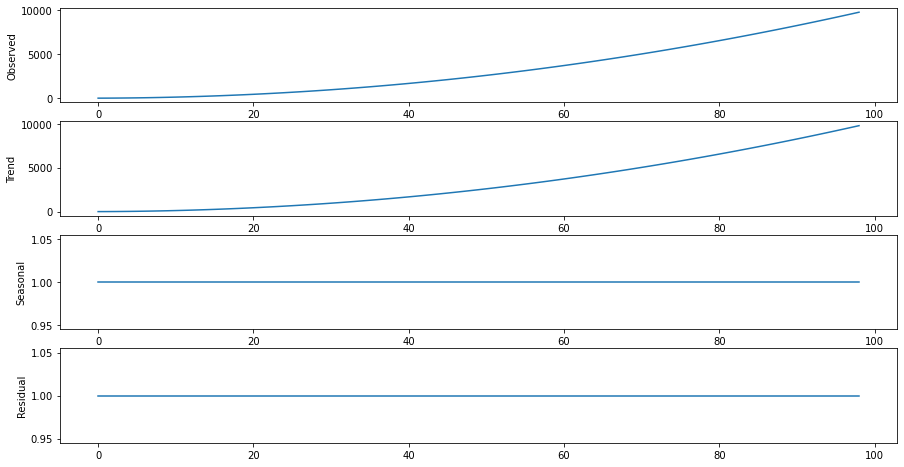

In [23]:
plot_decompose(result)

In [24]:
airline =pd.read_csv('./data/airline_passengers.csv', index_col = 'Month')

<AxesSubplot:xlabel='Month'>

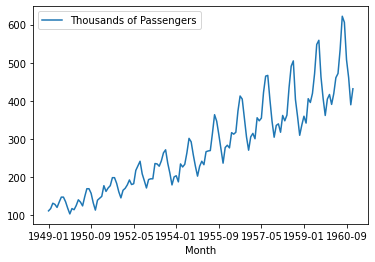

In [27]:
airline.plot()

In [29]:
airline.index = pd.to_datetime(airline.index)

In [31]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 7.2 KB


In [32]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [33]:
result = seasonal_decompose(airline['Thousands of Passengers'], model = 'multiplicative')

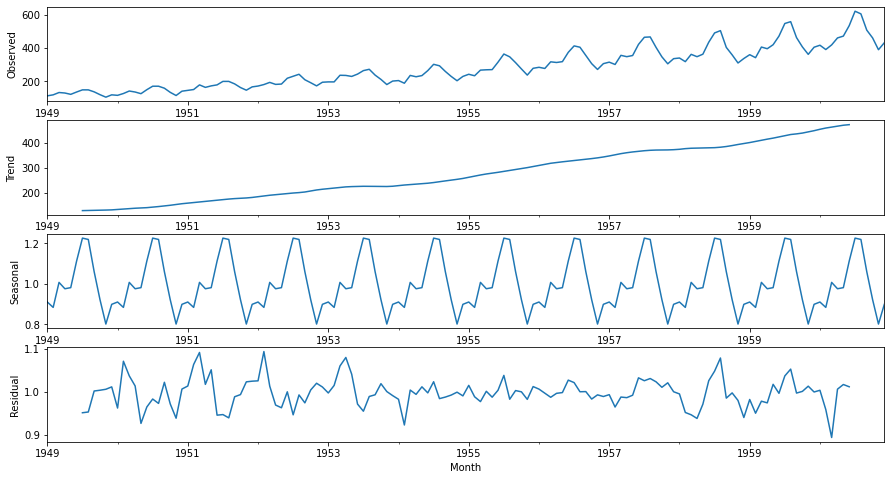

In [34]:
plot_decompose(result)